<a href="https://colab.research.google.com/github/Lucs1590/strava-analysis/blob/main/strava_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strava Analysis
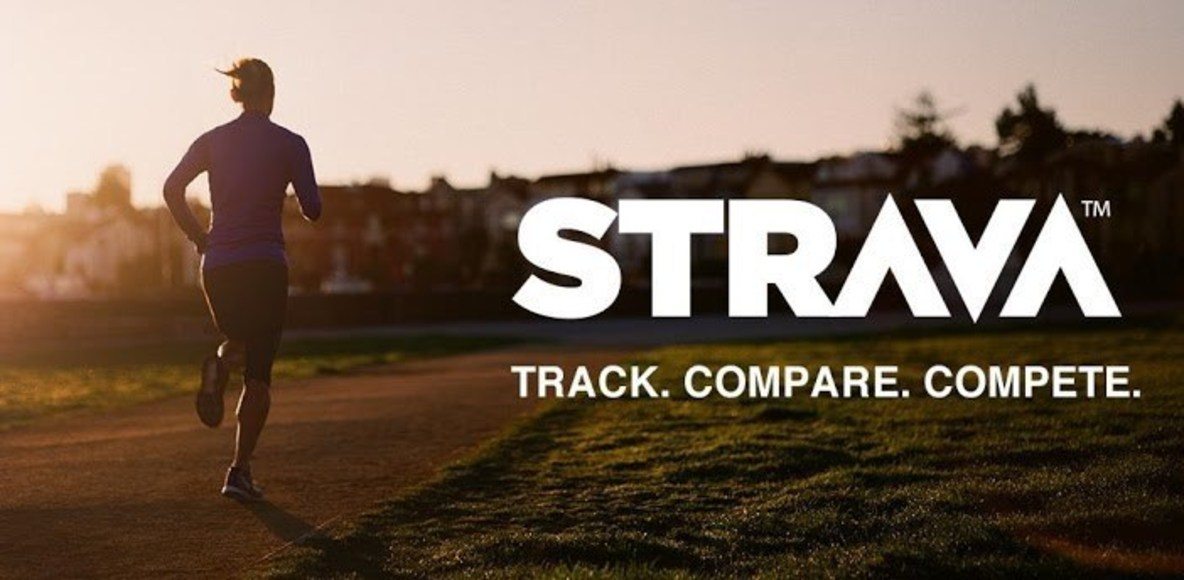
This notebook aims to make a data exploration searching by a pattern on user data and, after, try to predict the pace based on a distance and elevation.


## Imports

In [ ]:
# general

# df and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# machine learning and math
import math
from sklearn.feature_selection import mutual_info_classif

## Getting data and first contact

In [ ]:
pd.set_option('display.max_columns', None)
%matplotlib widget
%matplotlib inline

In [1]:
%run -i 'get_activities.py'

ERROR:root:File `'get_activities.py'` not found.


In [ ]:
df = pd.read_csv('result/strava_all_activities.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,start_latitude,start_longitude,average_speed,max_speed,average_cadence,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts
0,0,0,2,Corrida noturna,5051.2,1539,1539,25.4,Run,NaN,6867785488,2022-03-23T00:10:01Z,2022-03-22T21:10:01Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,0,6,0,1,0,False,False,False,False,everyone,False,g7550415,"[-22.101995, -50.180424]","[-22.106846, -50.17379]",-22.101995,-50.173790,3.282,5.256,81.7,True,168.1,183.0,False,True,607.3,589.2,7.306579e+09,7.306579e+09,shealthb1f6d835-6a17-4cb3-9bbb-330b198039b0.tcx,False,0,0,False,47005114,1,a6867785488,nx{eCtzgqHr@?VDbAHFAFGTq@D_@Bi@BmBD[Lc@JIVK?QG...,2,NaN,NaN,NaN
1,1,1,2,Corrida na hora do almoço,5039.4,1590,1593,23.7,Run,NaN,6647420413,2022-02-05T14:15:59Z,2022-02-05T11:15:59Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,0,5,0,2,0,False,False,False,False,everyone,False,g7550415,"[-22.759892, -47.582623]","[-22.752665, -47.587433]",-22.759892,-47.587433,3.169,3.841,82.4,True,175.0,188.0,False,True,632.2,604.7,7.069075e+09,7.069075e+09,shealthf3e604f7-0ca6-41dd-b83c-2fef0a561eed.tcx,False,0,0,False,47005114,1,a6647420413,jh|iClnlaHJ_@?]Q_@YSMAKAU@OHW^GZARDRPXRj@FFJ@n...,2,NaN,NaN,NaN
2,2,2,2,Corrida ao entardecer,513.9,137,140,7.8,Run,NaN,6614785271,2022-01-31T22:01:34Z,2022-01-31T19:01:34Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,0,3,0,1,0,False,False,False,False,everyone,False,g7550415,"[-22.10301, -50.18092]","[-22.102386, -50.18585]",-22.103010,-50.185850,3.751,4.287,81.4,True,57.3,72.0,False,True,602.7,594.4,7.034163e+09,7.034163e+09,shealthbff836db-47c5-47b0-a11a-62bc28c4f970.tcx,False,0,0,False,47005114,1,a6614785271,b}{eC~ihqHKfAOhCAdA,2,NaN,NaN,NaN
3,3,3,2,Caminhada ao entardecer,229.7,176,176,0.0,Walk,NaN,6614782478,2022-01-31T21:58:02Z,2022-01-31T18:58:02Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,0,3,0,1,0,False,False,False,False,everyone,False,g7550415,[],[],NaN,NaN,1.305,1.795,NaN,True,61.2,101.0,False,True,596.6,594.4,7.034160e+09,7.034160e+09,shealthf2a7d892-5fda-4c3b-bd61-6fade134011b.tcx,False,0,0,False,47005114,1,a6614782478,NaN,2,NaN,NaN,NaN
4,4,4,2,Corrida ao entardecer,3085.0,906,906,12.7,Run,NaN,6614770551,2022-01-31T21:41:59Z,2022-01-31T18:41:59Z,(GMT-03:00) America/Sao_Paulo,-10800.0,NaN,NaN,Brasil,0,5,0,1,0,False,False,False,False,everyone,False,g7550415,"[-22.103748, -50.178757]","[-22.103958, -50.178192]",-22.103748,-50.178192,3.405,4.584,80.2,True,158.9,180.0,False,True,604.8,594.4,7.034147e+09,7.034147e+09,shealthf27b6a02-7f1d-49dd-a399-c2c7563f9ab1.tcx,False,0,0,False,47005114,1,a6614770551,n_|eCf{gqHUjBKrBUtCUfBI|@A~@SfDKvCUnD?`AKzCFVN...,2,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'resource_state', 'name', 'distance',
       'moving_time', 'elapsed_time', 'total_elevation_gain', 'type',
       'workout_type', 'id', 'start_date', 'start_date_local', 'timezone',
       'utc_offset', 'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'start_latitude',
       'start_longitude', 'average_speed', 'max_speed', 'average_cadence',
       'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'average_wa

In [ ]:
df.shape

(222, 59)

In [ ]:
df.isnull().sum().sum()

2045

In [ ]:
null_df = [[col, df[col].isnull().sum()] for col in df.columns]
list(filter(lambda x: x[1]>0, null_df))

[['workout_type', 96],
 ['location_city', 222],
 ['location_state', 222],
 ['location_country', 3],
 ['gear_id', 86],
 ['start_latitude', 47],
 ['start_longitude', 47],
 ['average_cadence', 94],
 ['average_heartrate', 159],
 ['max_heartrate', 159],
 ['elev_high', 44],
 ['elev_low', 44],
 ['upload_id', 40],
 ['upload_id_str', 40],
 ['external_id', 88],
 ['map.summary_polyline', 47],
 ['average_watts', 203],
 ['kilojoules', 203],
 ['device_watts', 201]]

## Data manipulation

In [ ]:
raw_df = df

In [ ]:
selected_columns = ['id','name', 'distance', 'moving_time', 'total_elevation_gain', 'type',
                    'start_date_local',  'start_latitude', 'start_longitude', 'athlete_count','average_speed',
                    'max_speed','average_cadence', 'average_heartrate','elev_high', 'elev_low', 'pr_count',
                    'average_watts', 'kilojoules', 'device_watts']

In [ ]:
df = df[selected_columns]
df.head()

,id,name,distance,moving_time,total_elevation_gain,type,start_date_local,start_latitude,start_longitude,athlete_count,average_speed,max_speed,average_cadence,average_heartrate,elev_high,elev_low,pr_count,average_watts,kilojoules,device_watts
0,6867785488,Corrida noturna,5051.2,1539,25.4,Run,2022-03-22T21:10:01Z,-22.101995,-50.173790,1,3.282,5.256,81.7,168.1,607.3,589.2,0,NaN,NaN,NaN
1,6647420413,Corrida na hora do almoço,5039.4,1590,23.7,Run,2022-02-05T11:15:59Z,-22.759892,-47.587433,2,3.169,3.841,82.4,175.0,632.2,604.7,0,NaN,NaN,NaN
2,6614785271,Corrida ao entardecer,513.9,137,7.8,Run,2022-01-31T19:01:34Z,-22.103010,-50.185850,1,3.751,4.287,81.4,57.3,602.7,594.4,0,NaN,NaN,NaN
3,6614782478,Caminhada ao entardecer,229.7,176,0.0,Walk,2022-01-31T18:58:02Z,NaN,NaN,1,1.305,1.795,NaN,61.2,596.6,594.4,0,NaN,NaN,NaN
4,6614770551,Corrida ao entardecer,3085.0,906,12.7,Run,2022-01-31T18:41:59Z,-22.103748,-50.178192,1,3.405,4.584,80.2,158.9,604.8,594.4,0,NaN,NaN,NaN


In [ ]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'], errors='coerce')

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7131/4095640816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date_local'] = pd.to_datetime(df['start_date_local'], errors='coerce')


In [ ]:
df = df.sort_values(by='start_date_local')

In [ ]:
df['start_time'] = df['start_date_local'].dt.time
df['start_date'] = df['start_date_local'].dt.date

In [ ]:
df = df.drop('start_date_local', 1)
df.head()

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7131/2372681409.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('start_date_local', 1)


,id,name,distance,moving_time,total_elevation_gain,type,start_latitude,start_longitude,athlete_count,average_speed,max_speed,average_cadence,average_heartrate,elev_high,elev_low,pr_count,average_watts,kilojoules,device_watts,start_time,start_date
221,2753119647,Evening Ride,1585.6,345,10.3,Ride,-22.070302,-50.306393,1,4.596,8.9,NaN,NaN,606.2,596.4,0,NaN,NaN,False,20:09:18,2019-09-30
220,2753195842,Evening Run,1556.1,477,26.0,Run,-22.067056,-50.306762,1,3.262,3.6,NaN,NaN,602.6,589.4,0,NaN,NaN,NaN,20:33:06,2019-09-30
219,2753233770,Night Ride,225.4,61,0.0,Ride,-22.069931,-50.304896,1,3.695,7.1,NaN,NaN,607.3,599.1,0,NaN,NaN,False,21:15:01,2019-09-30
218,2755746533,Evening Ride,203.7,62,0.0,Ride,NaN,NaN,1,3.285,7.7,NaN,NaN,599.0,596.8,0,28.3,1.8,False,20:08:30,2019-10-01
217,2755853084,Night Ride,192.9,61,0.0,Ride,-22.069822,-50.305242,1,3.162,6.2,NaN,NaN,607.1,599.2,0,69.3,4.2,False,21:02:29,2019-10-01


In [ ]:
df = df.drop(df[df.average_speed > 30].index)

## Visualization

Text(0.5, 1.0, 'Exercices')

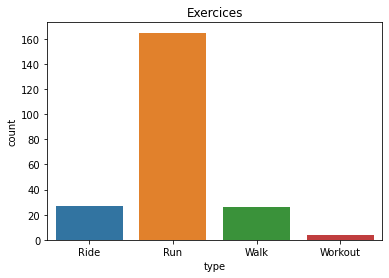

In [ ]:
fig = sns.countplot(x='type', data=df).set_title('Exercices')
fig

In [ ]:
df['year']= df['start_date'].map(lambda x: x.year)

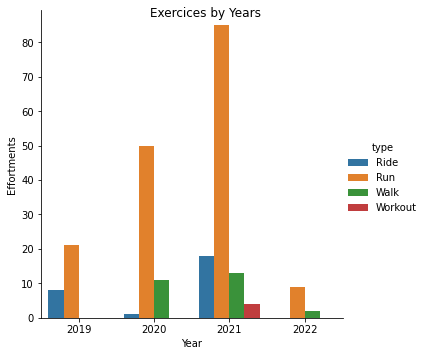

In [ ]:
fig = sns.catplot(x='year', hue='type', data=df, kind='count')
fig.fig.suptitle('Exercices by Years')
fig.set_xlabels('Year')
fig.set_ylabels('Effortments')
fig

## Running Analysis

In [ ]:
runs = df.loc[df['type'] == 'Run']
runs

,id,name,distance,moving_time,total_elevation_gain,type,start_latitude,start_longitude,athlete_count,average_speed,max_speed,average_cadence,average_heartrate,elev_high,elev_low,pr_count,average_watts,kilojoules,device_watts,start_time,start_date,year
220,2753195842,Evening Run,1556.1,477,26.0,Run,-22.067056,-50.306762,1,3.262,3.600,NaN,NaN,602.6,589.4,0,NaN,NaN,NaN,20:33:06,2019-09-30,2019
215,2781031587,Night Run,102.0,61,0.0,Run,-22.068252,-50.308969,1,1.672,1.900,NaN,NaN,594.4,589.9,0,NaN,NaN,NaN,21:40:58,2019-10-09,2019
213,2781127867,Evening Ride,2586.9,2756,54.0,Run,-22.067178,-50.308717,1,0.939,3.800,NaN,NaN,597.5,588.2,0,NaN,NaN,NaN,19:06:54,2019-10-11,2019
211,2789528029,Evening Run,2219.2,1068,39.3,Run,-22.067135,-50.309288,2,2.078,3.700,NaN,NaN,597.5,588.8,3,NaN,NaN,NaN,19:50:11,2019-10-14,2019
210,2828174770,Morning Run,4505.2,2092,41.4,Run,-22.108612,-50.195598,2,2.154,3.700,NaN,NaN,618.5,595.9,4,NaN,NaN,NaN,07:15:57,2019-10-30,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,6551318435,A pior corrida do ano,8059.1,2919,85.2,Run,-22.102870,-50.183610,1,2.761,4.512,76.2,170.2,609.1,592.0,0,NaN,NaN,NaN,17:52:34,2022-01-19,2022
4,6614770551,Corrida ao entardecer,3085.0,906,12.7,Run,-22.103748,-50.178192,1,3.405,4.584,80.2,158.9,604.8,594.4,0,NaN,NaN,NaN,18:41:59,2022-01-31,2022
2,6614785271,Corrida ao entardecer,513.9,137,7.8,Run,-22.103010,-50.185850,1,3.751,4.287,81.4,57.3,602.7,594.4,0,NaN,NaN,NaN,19:01:34,2022-01-31,2022
1,6647420413,Corrida na hora do almoço,5039.4,1590,23.7,Run,-22.759892,-47.587433,2,3.169,3.841,82.4,175.0,632.2,604.7,0,NaN,NaN,NaN,11:15:59,2022-02-05,2022


In [ ]:
runs['elev'] = runs['elev_high'] - runs['elev_low']

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_7131/1516556042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs['elev'] = runs['elev_high'] - runs['elev_low']


220    3.262
215    1.672
213    0.939
211    2.078
210    2.154
       ...  
6      2.761
4      3.405
2      3.751
1      3.169
0      3.282
Name: average_speed, Length: 165, dtype: float64

In [ ]:
runs[runs['elev'] > 100]

,id,name,distance,moving_time,total_elevation_gain,type,start_latitude,start_longitude,athlete_count,average_speed,max_speed,average_cadence,average_heartrate,elev_high,elev_low,pr_count,average_watts,kilojoules,device_watts,start_time,start_date,year,elev
78,5443797490,Corrida vespertina,8818.5,3797,178.9,Run,-22.07057,-50.295845,2,2.322,5.200,72.1,NaN,611.0,471.0,0,NaN,NaN,NaN,17:29:13,2021-06-09,2021,140.0
18,6161919342,Corrida na hora do almoço,13578.7,4290,153.8,Run,-22.07072,-50.382700,1,3.165,4.454,80.7,178.6,603.1,495.5,0,NaN,NaN,NaN,11:25:27,2021-10-24,2021,107.6


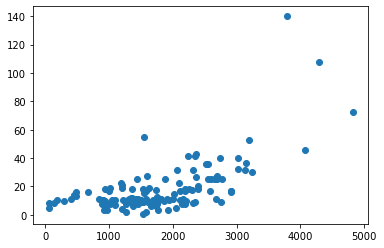

In [ ]:
plt.scatter(runs['moving_time'],runs['elev'])
plt.show()

Text(0.5, 1.0, 'Average Speed vs Distance')

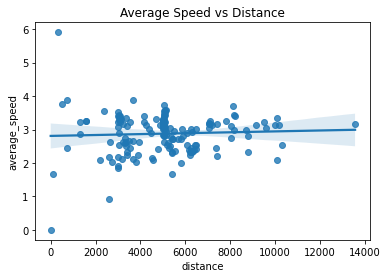

In [ ]:
sns.regplot(x='distance', y = 'average_speed', data=runs).set_title("Average Speed vs Distance")

Text(0.5, 1.0, 'Max Speed vs Distance')

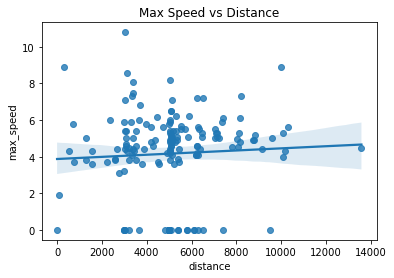

In [ ]:
sns.regplot(x='distance', y = 'max_speed', data=runs).set_title("Max Speed vs Distance")

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_8487/3097083979.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


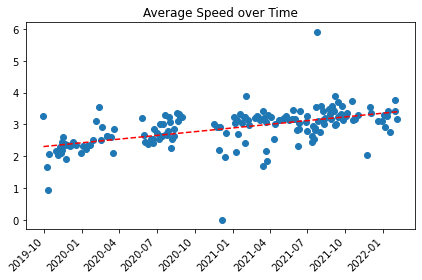

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.asarray(runs.start_date)
y = np.asarray(runs.average_speed)

ax1.plot_date(x, y)
ax1.set_title('Average Speed over Time')

#add trend line
x2 = mdates.date2num(x)

z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

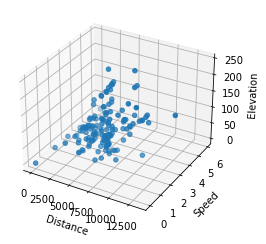

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = runs['distance']
y = runs['average_speed']
z = runs['total_elevation_gain']

ax.set_xlabel("Distance")
ax.set_ylabel("Speed")
ax.set_zlabel("Elevation")

ax.scatter(x, y, z)

plt.show()

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_8487/2795868733.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


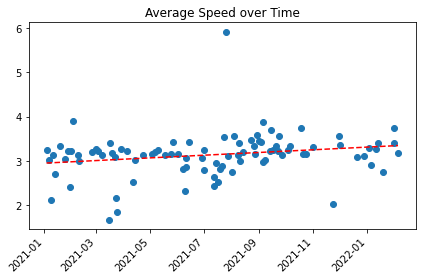

In [ ]:
startdate = pd.to_datetime("2021-01-01").date()
recently_runs = runs.loc[runs['start_date'] > startdate]

fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.asarray(recently_runs.start_date)
y = np.asarray(recently_runs.average_speed)

ax1.plot_date(x, y)
ax1.set_title('Average Speed over Time')

#add trend line
x2 = mdates.date2num(x)

z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

## Biking Analysis

In [ ]:
rides = df.loc[df['type'] == 'Ride']
rides

,id,name,distance,moving_time,total_elevation_gain,type,start_latitude,start_longitude,athlete_count,average_speed,max_speed,average_cadence,average_heartrate,elev_high,elev_low,pr_count,average_watts,kilojoules,device_watts,start_time,start_date,year
220,2753119647,Evening Ride,1585.6,345,10.3,Ride,-22.070302,-50.306393,1,4.596,8.9,NaN,NaN,606.2,596.4,0,NaN,NaN,False,20:09:18,2019-09-30,2019
218,2753233770,Night Ride,225.4,61,0.0,Ride,-22.069931,-50.304896,1,3.695,7.1,NaN,NaN,607.3,599.1,0,NaN,NaN,False,21:15:01,2019-09-30,2019
217,2755746533,Evening Ride,203.7,62,0.0,Ride,NaN,NaN,1,3.285,7.7,NaN,NaN,599.0,596.8,0,28.3,1.8,False,20:08:30,2019-10-01,2019
216,2755853084,Night Ride,192.9,61,0.0,Ride,-22.069822,-50.305242,1,3.162,6.2,NaN,NaN,607.1,599.2,0,69.3,4.2,False,21:02:29,2019-10-01,2019
215,2776607227,Night Ride,1630.9,373,24.8,Ride,-22.070381,-50.306692,1,4.372,9.6,NaN,NaN,611.2,596.8,0,77.7,29.0,False,21:13:16,2019-10-09,2019
213,2781127862,Evening Ride,1608.2,351,25.0,Ride,-22.070452,-50.306611,1,4.582,7.9,NaN,NaN,611.2,596.8,0,87.2,30.6,False,18:47:12,2019-10-11,2019
211,2781140196,Evening Ride,305.9,88,0.0,Ride,-22.069888,-50.304126,1,3.476,6.6,NaN,NaN,607.0,599.1,0,70.0,6.2,False,19:55:40,2019-10-11,2019
206,2858518319,Evening Ride,1980.0,417,32.1,Ride,-22.070432,-50.306708,1,4.748,10.1,NaN,NaN,611.2,587.4,0,89.8,37.4,False,20:37:02,2019-11-11,2019
190,3002630090,Morning Ride,1544.2,310,15.1,Ride,-22.070524,-50.293364,1,4.981,8.5,NaN,NaN,611.1,596.8,0,76.5,23.7,False,10:39:02,2020-01-11,2020
128,4573720222,Evening Ride,11300.0,1863,0.0,Ride,NaN,NaN,1,6.065,0.0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,19:21:18,2021-01-05,2021


Text(0.5, 1.0, 'Average Speed vs Distance')

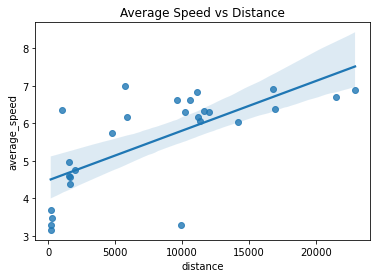

In [ ]:
sns.regplot(x='distance', y = 'average_speed', data=rides).set_title("Average Speed vs Distance")

Text(0.5, 1.0, 'Max Speed vs Distance')

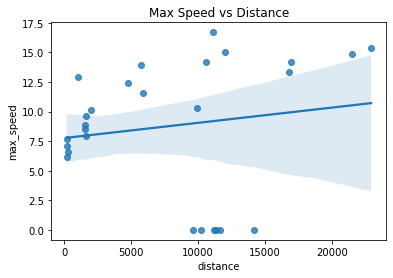

In [ ]:
sns.regplot(x='distance', y = 'max_speed', data=rides).set_title("Max Speed vs Distance")

/var/folders/xc/brt57cys157_3fpw5lmlrpkc0000gn/T/ipykernel_8487/2184546799.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


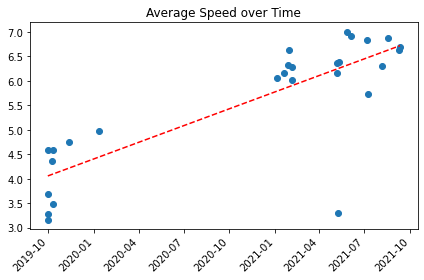

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = np.asarray(rides.start_date)
y = np.asarray(rides.average_speed)

ax1.plot_date(x, y)
ax1.set_title('Average Speed over Time')

#add trend line
x2 = mdates.date2num(x)

z=np.polyfit(x2,y,1)
p=np.poly1d(z)
plt.plot(x,p(x2),'r--')

fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

Text(0.5, 1.0, 'Distance vs Elevation Gain')

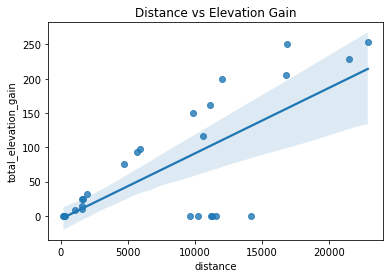

In [ ]:
sns.regplot(x='distance', y = 'total_elevation_gain', data = rides ).set_title("Distance vs Elevation Gain")